# Assignment 13 Naive Bayes. 
## Dataset :- SalaryData_Train
## Classification model using Naive Bayes
### Quick info. about Text mining.
### Info :- 
Naïve Bayes classifiers are a family of probabilistic classifiers based on Bayes Theorem with a strong assumption of independence between the features. These are not only fast and reliable but also simple and easiest classifier which is proving its stability in machine learning world. Despite its simplicity, it gives accurate prediction in text classification problems.
“Naive” i.e not correlated to each other.
Bayes Theorem is a simple mathematical formula used to calculated the conditional probability of for each target label given a data set. Conditional probability measures the probability of an event occurring when another related event is already has occurred.
#### Advantages
This algorithm works quickly and can save a lot of time. 
Naive Bayes is suitable for solving multi-class prediction problems. 
If its assumption of the independence of features holds true, it can perform better than other models and requires much less training data. 
Naive Bayes is better suited for categorical input variables than numerical variables.
#### Disadvantages
Naive Bayes assumes that all predictors (or features) are independent, rarely happening in real life. This limits the applicability of this algorithm in real-world use cases.
This algorithm faces the ‘zero-frequency problem’ where it assigns zero probability to a categorical variable whose category in the test data set wasn’t available in the training dataset. It would be best if you used a smoothing technique to overcome this issue.
Its estimations can be wrong in some cases, so you shouldn’t take its probability outputs very seriously. 

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.naive_bayes import GaussianNB,CategoricalNB
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from collections import Counter
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### Data Loading

In [2]:
SalaryData_Train01 = pd.read_csv(r"D:\Data Science Material\Assignments\Naive Bayes\SalaryData_Train.csv")

In [3]:
SalaryData_Train01.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#### Exploring data set 

In [4]:
# Simple statistical measures

SalaryData_Train01.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [5]:
# lets explore about the data types, null cols, dataset length, rows and columns

SalaryData_Train01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [6]:
SalaryData_Train01.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


#### Data Analysis

In [7]:
SalaryData_Train01.shape

(30161, 14)

In [8]:
# checking null values
SalaryData_Train01.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [9]:
# Exploring columns more
SalaryData_Train01.workclass.value_counts()

 Private             22285
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: workclass, dtype: int64

In [10]:
# Exploring columns more
SalaryData_Train01.education.value_counts()

 HS-grad         9840
 Some-college    6677
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [11]:
# Exploring columns more
SalaryData_Train01.maritalstatus.value_counts()

 Married-civ-spouse       14065
 Never-married             9725
 Divorced                  4214
 Separated                  939
 Widowed                    827
 Married-spouse-absent      370
 Married-AF-spouse           21
Name: maritalstatus, dtype: int64

In [12]:
# Exploring columns more
SalaryData_Train01.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [13]:
# Exploring columns more
SalaryData_Train01.sex.value_counts()

 Male      20380
 Female     9781
Name: sex, dtype: int64

In [14]:
# Exploring columns more
SalaryData_Train01.relationship.value_counts()

 Husband           12463
 Not-in-family      7726
 Own-child          4466
 Unmarried          3212
 Wife               1406
 Other-relative      888
Name: relationship, dtype: int64

In [15]:
# Exploring columns more
SalaryData_Train01.race.value_counts()

 White                 25932
 Black                  2817
 Asian-Pac-Islander      895
 Amer-Indian-Eskimo      286
 Other                   231
Name: race, dtype: int64

In [16]:
# making original data safe
SalaryData_Train = SalaryData_Train01.copy()

#### Data Cleaning 

In [17]:
SalaryData_Train.head(1)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K


In [18]:
# deleting unwanted cols
SalaryData_Train.drop(['educationno','race'],inplace = True, axis = 1)

In [19]:
# after deleting cols data look like
SalaryData_Train.head(1)

,age,workclass,education,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K


#### Outlier 

In [20]:
def count_plot(df,columns):
    plt.figure(figsize = (20,5))
    for i, var in enumerate(columns):
        plt.subplot(1,2,1)
        g = sns.countplot(df[var])
    plt.tight_layout()
    
    
features = SalaryData_Train.columns.tolist()
features.remove('Salary')
features

['age',
 'workclass',
 'education',
 'maritalstatus',
 'occupation',
 'relationship',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native']

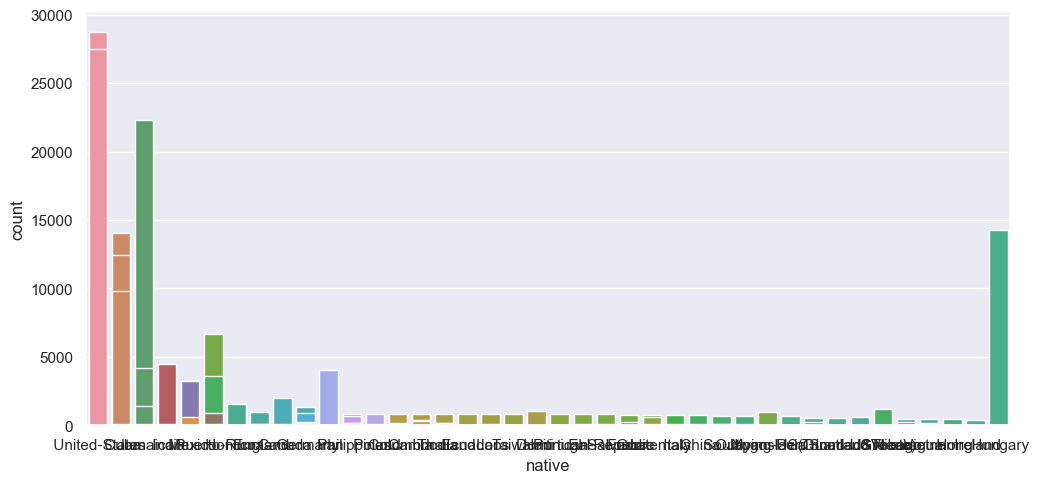

In [21]:
count_plot(SalaryData_Train,features)
plt.show()

In [22]:
# OrdinalEncoder - The input to this transformer should be an array-like of integers or strings, 
# denoting the values taken on by categorical (discrete) features. 
# The features are converted to ordinal integers. 
# This results in a single column of integers (0 to n_categories - 1) per feature.

encoder = OrdinalEncoder()
data_encoder = encoder.fit_transform(SalaryData_Train[features])
SalaryData_Train_encoded = pd.DataFrame(data_encoder,columns = features)

data_encoder

array([[22.,  5.,  9., ...,  0., 39., 37.],
       [33.,  4.,  9., ...,  0., 12., 37.],
       [21.,  2., 11., ...,  0., 39., 37.],
       ...,
       [41.,  2., 11., ...,  0., 39., 37.],
       [ 5.,  2., 11., ...,  0., 19., 37.],
       [35.,  3., 11., ...,  0., 39., 37.]])

In [23]:
# LabelEncoder : - Encode target labels with values betn 0 and n_classes-1.
# this transform should be used to encode the target values i.e y and not to X input variable

encoder = LabelEncoder()
target_encoded = encoder.fit_transform(SalaryData_Train['Salary'])
SalaryData_Train_encoded['Salary'] = target_encoded
encoder.inverse_transform(target_encoded)


array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [24]:
# main data after cleaning look like , now we applying NB model on it 
SalaryData_Train_encoded.head(3)

,age,workclass,education,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22.0,5.0,9.0,4.0,0.0,1.0,1.0,24.0,0.0,39.0,37.0,0
1,33.0,4.0,9.0,2.0,3.0,0.0,1.0,0.0,0.0,12.0,37.0,0
2,21.0,2.0,11.0,0.0,5.0,1.0,1.0,0.0,0.0,39.0,37.0,0


### Model Building

In [25]:
# independent and dependent variable 

X = SalaryData_Train_encoded.iloc[: , :-1]
y = SalaryData_Train_encoded['Salary']

In [26]:
X.shape

(30161, 11)

In [27]:
y.shape

(30161,)

#### Train Test Split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=143)

In [29]:
X_train.shape, X_test.shape

((21112, 11), (9049, 11))

In [30]:
y_train.shape, y_test.shape

((21112,), (9049,))

#### Model Fitting

In [31]:
classifier_NB = CategoricalNB()

In [32]:
classifier_NB.fit(X_train, y_train)

CategoricalNB()

In [33]:
## Performance metrics, training score 

y_pred = classifier_NB.predict(X_test)

In [34]:
## Use the model to prediction on test data 

print("...........Categorical_NB.......")
print("=" * 40)

accuracy = accuracy_score(y_test , y_pred)
print("...........Accuracy :- {:.2f}".format(accuracy))

...........Categorical_NB.......
...........Accuracy :- 0.83
